In [35]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import scipy as scp
#import scipy.stats as stats

In [36]:
df= pd.read_excel(r"C:\Users\dhrit\Desktop\Data_CDAP_10_11-Main.xlsx")
df.head(5)

,PMC_ID,PMC_Year,Journal,Article Title,Secondary analysis,Data availability statement (yes/no),Data availability (yes/no),"If Data availability = yes, where do they share data? (SRA/GEO/other)","If other database, specifiy which one",Code availability statement (Yes/No),Code availability (Yes/No (reason)),Analytical code availability (Yes/No),What kind of code do they share?,Where do they share code (supplementary/ GitHub/ other),"If analytical code availability = yes, where do they share code (supplementary/ GitHub/ other)","If Code availability = yes, do they share the code as notebook or R markdown file (.Rmd)? (yes/no)","If yes, notebook/Rmd","If yes, single/ multiple",Summary data (yes/ no/ partial),Number of citations
0,PMC5048069,2016.0,Bioinformatics,PEP_scaffolder: using (homologous) proteins to...,no,no,no,NaN,NaN,Yes,No (Link Expired),No,Software,Other(Website),NaN,Can't tell,Can't tell,Can't tell,Can't tell,11
1,PMC5254078,2016.0,Bioinformatics,FoldAtlas: a repository for genome-wide RNA st...,no,yes,yes,SRA,NaN,Yes,Yes,Yes,Database,GitHub,GitHub,No,NaN,NaN,No,12
2,PMC4908329,2016.0,Bioinformatics,A convex optimization approach for identificat...,yes,NaN,NaN,NaN,NaN,Yes,No (Link Expired),No,Pipeline,Other(Website),NaN,Can't tell,Can't tell,Can't tell,Can't tell,12
3,PMC4908319,2016.0,Bioinformatics,Privacy-preserving microbiome analysis using s...,yes,NaN,NaN,NaN,NaN,Yes,No (Link Expired),No,Software,Other(Website),NaN,Can't tell,Can't tell,Can't tell,Can't tell,18
4,PMC4920110,2016.0,Bioinformatics,Phasing for medical sequencing using rare vari...,yes,NaN,NaN,NaN,NaN,Yes,No (Link Expired),No,Software,Other(Website),NaN,Can't tell,Can't tell,Can't tell,Can't tell,19


In [3]:
print(df['Secondary analysis'].value_counts())

no     268
yes    212
Name: Secondary analysis, dtype: int64


In [4]:
print(df['Data availability statement (yes/no)'].value_counts())

yes    169
no      99
Name: Data availability statement (yes/no), dtype: int64


In [5]:
## 268 primary analysis papers

print(df['Data availability (yes/no)'].value_counts())

no                             159
yes                             97
No (Available upon request)     12
Name: Data availability (yes/no), dtype: int64


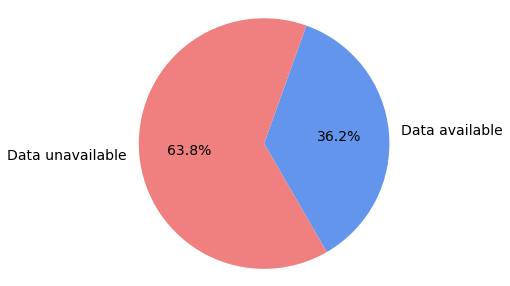

In [6]:
labels = 'Data available', 'Data unavailable'
sizes = [97, 171]
explode = (0, 0) 
colors = ['cornflowerblue', 'lightcoral']
textprops = {"fontsize":14}

# Plot
fig1, ax1 = plt.subplots(figsize = (5,5))
#plt.title("  Data availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=300, textprops = textprops, colors=colors)
ax1.axis('equal') 

sns.despine()
plt.show()

In [7]:
print(df['If Data availability = yes, where do they share data? (SRA/GEO/other)'].value_counts())

other    42
GEO      39
SRA      16
Name: If Data availability = yes, where do they share data? (SRA/GEO/other), dtype: int64


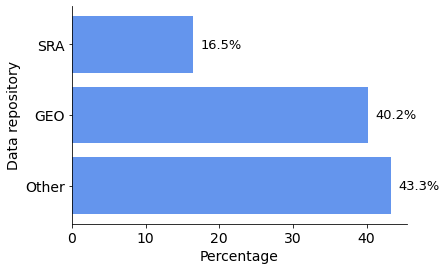

In [8]:
colors=['cornflowerblue']   
fig, ax= plt.subplots(figsize=(6,4)) 

dataavailability = ['Other','GEO', 'SRA']
Percentage = [43.29,40.2,16.49]

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax.barh(dataavailability, Percentage, color=colors)   

plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Data repository", fontsize=14)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment
    
sns.despine()
plt.show()

In [9]:
print(df['If other database, specifiy which one'].value_counts())

Protein Data Bank                       5
EGA                                     4
ENA                                     4
Zenodo                                  2
Excel Sheets                            2
supplementary file                      2
dbGaP                                   2
Addgene                                 2
NCBI                                    1
 cBioPortal                             1
GSE                                     1
Project Mine web browser                1
CBI Sequence Read Archive repository    1
Biobank                                 1
DDBJ/ENA/GenBank                        1
PXD                                     1
gb file                                 1
European Genotype Phenotype Archive     1
zip file                                1
IGCG                                    1
GB-eaSy pipeline                        1
Korea National Institute of Health      1
GenBank                                 1
EGP                               

## Code Availability

In [10]:
print(df['Code availability statement (Yes/No)'].value_counts())
## No - 275
## Yes - 205

No     275
Yes    205
Name: Code availability statement (Yes/No), dtype: int64


In [11]:
## Code availability irrespective of type of code
print(df['Code availability (Yes/No (reason))'].value_counts())
## Yes - 222
## No - 258

No                             224
Yes                            222
No (Available upon request)      9
No (available upon request)      8
No (Link Expired)                7
No (Link expired)                4
No                               3
No (No access on BitBucket)      1
No (Cannot find the code)        1
No (link does Not work)          1
Name: Code availability (Yes/No (reason)), dtype: int64


In [12]:
## Analytical Code availability out of 480

print(df['Analytical code availability (Yes/No)'].value_counts())

## Yes - 43
## No - 437

No     437
Yes     43
Name: Analytical code availability (Yes/No), dtype: int64


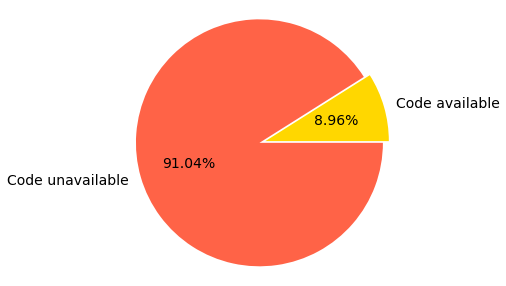

In [13]:
labels = 'Code available', 'Code unavailable'
sizes = [43, 437]
explode = (0.05, 0) 
colors = ['gold', 'tomato']
textprops = {"fontsize":14}

# Plot
#plt.rcParams['font.size']=14
fig1, ax1 = plt.subplots(figsize = (5,5))
#plt.title("Code availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=colors, startangle=360, textprops = textprops)
ax1.axis('equal')

sns.despine()
plt.savefig(r'C:\Users\dhrit\code1.jpg', bbox_inches='tight', dpi=600)
plt.show()

In [14]:
print(df['What kind of code do they share?'].value_counts())

Pipeline                                      44
Python Package                                39
R Package                                     32
Analytical                                    13
Tool                                          11
Package                                       10
no                                             9
Software                                       9
pipeline                                       7
Jupyter Notebook                               7
uncertain                                      6
software                                       5
tool                                           4
R package                                      3
Matlab                                         2
Python + R scripts                             2
Matlab scripts                                 2
C++                                            2
Python + C++                                   2
Shell Script                                   1
Protocol            

In [15]:
print(df['Where do they share code (supplementary/ GitHub/ other)'].value_counts())

GitHub                                      167
Other(Website)                                9
no                                            9
Zenodo                                        8
Other (Website)                               8
Zenodo/GitHub                                 3
GitHub + Zenodo                               3
Supplementary                                 3
CRAN                                          2
Other (Bitbucket)                             2
BitBucket                                     2
gitlab                                        2
Other(Sourceforge)                            2
downloadable file                             2
Others (Website)                              2
Others(Supplementary)                         1
girthub                                       1
gitub                                         1
downloadable files                            1
Other (Sourceforge)                           1
Center for Integrative Bioinformatics VU

In [16]:
## Analytical Code 
print(df['If analytical code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts())

GitHub                      33
Other                        3
Supplementary                2
Zenodo                       2
Other (10x Genomics)         1
GitHub and Supplementary     1
Other (Website)              1
Name: If analytical code availability = yes, where do they share code (supplementary/ GitHub/ other), dtype: int64


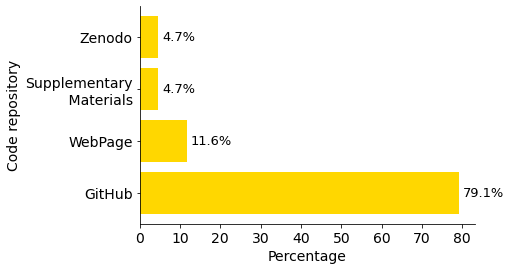

In [17]:
fig3, ax = plt.subplots(edgecolor ='none', figsize=(6,4))
#colors= ['lightsalmon', 'lightgreen', 'lightblue', 'yellow', 'pink']
colors=["gold"]
textprops = {"fontsize":14}

#codeavailability = ['GitHub', 'Supplementary Section', 'Supplementary and GitHub', 'Zenodo', 'WebPage']
#Supp&GitHub + GitHub = 1 + 33 = 34
codeavailability = ['GitHub',  'WebPage', 'Supplementary\n Materials', 'Zenodo']
count = [34,2,2,5]
Percentage = [79.06, 11.62, 4.65,4.65]

ax.barh(codeavailability, Percentage, color=colors) 
#ax.axis("off")
##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Code repository", fontsize=14)

sns.despine()
plt.savefig(r'C:\Users\dhrit\code1.jpg', bbox_inches='tight', dpi=600)
plt.show()

## Number of citations and code availability

In [39]:
#x=df['Number of citations']
#x.dropna()

df['Number of citations'] = df['Number of citations'].apply(lambda x:0 if type(x)!=int else x)
available = df.loc[df["Analytical code availability (Yes/No)"]=="Yes","Number of citations"]
#no =(df.loc[df["Code availability (Yes/No)"]=="No","Number of citations"]).dropna()
no =df.loc[df["Analytical code availability (Yes/No)"]=="No","Number of citations"]

mwu_results = stats.mannwhitneyu(available, no, alternative="greater")
mwu2_results = stats.mannwhitneyu(available, no, alternative="less")
mwu3_results = stats.mannwhitneyu(available, no, alternative="two-sided")

print(mwu_results)
print(mwu2_results)
print(mwu3_results)

MannwhitneyuResult(statistic=8229.5, pvalue=0.9105756524476992)
MannwhitneyuResult(statistic=8229.5, pvalue=0.08961074488489634)
MannwhitneyuResult(statistic=8229.5, pvalue=0.17922148976979269)


In [40]:
df['Number of citations'] = df['Number of citations'].apply(lambda x:0 if type(x)!=int else x)

In [20]:
set([i for i in no.values if type(i)==str])

set()

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

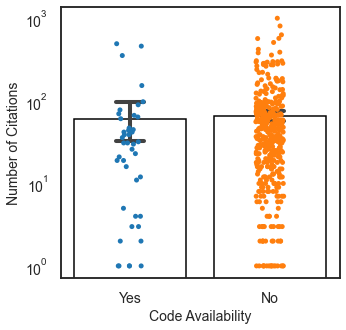

In [41]:
plt.figure(figsize=(5,5))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(data=df, x="Analytical code availability (Yes/No)", y="Number of citations",
             order=["Yes", "No"])
sns.barplot(x="Analytical code availability (Yes/No)", y="Number of citations", data=df, 
            estimator=np.mean, capsize=.2, facecolor="white", edgecolor="black",
           order=["Yes", "No"])


plt.xlabel("Code Availability", fontsize=14)
plt.yscale('log')
plt.ylim(ymax=1400)
plt.ylabel("Number of Citations", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#pvalue = mpatches.Patch(color ="white", label='p=0.08')

#plt.legend(handles=[pvalue], fontsize=12)


In [44]:
#x=df['Number of citations']
#x.dropna()

df['Number of citations'] = df['Number of citations'].apply(lambda x:0 if type(x)!=int else x)
available = df.loc[df["Data availability (yes/no)"]=="yes","Number of citations"]
#no =(df.loc[df["Code availability (Yes/No)"]=="No","Number of citations"]).dropna()
no =df.loc[df["Data availability (yes/no)"]=="no","Number of citations"]

mwu_results = stats.mannwhitneyu(available, no, alternative="greater")
mwu2_results = stats.mannwhitneyu(available, no, alternative="less")
mwu3_results = stats.mannwhitneyu(available, no, alternative="two-sided")

print(mwu_results)
print(mwu2_results)
print(mwu3_results)

MannwhitneyuResult(statistic=9562.0, pvalue=0.0006414235870560501)
MannwhitneyuResult(statistic=9562.0, pvalue=0.9993624594730077)
MannwhitneyuResult(statistic=9562.0, pvalue=0.0012828471741121001)


(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

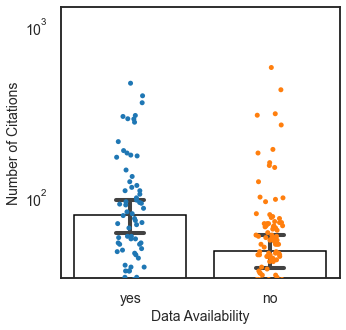

In [48]:
plt.figure(figsize=(5,5))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(data=df, x="Data availability (yes/no)", y="Number of citations",
             order=["yes", "no"])
sns.barplot(x="Data availability (yes/no)", y="Number of citations", data=df, 
            estimator=np.mean, capsize=.2, facecolor="white", edgecolor="black",
           order=["yes", "no"])


plt.xlabel("Data Availability", fontsize=14)
plt.yscale('log')
plt.ylim(ymax=1300)
plt.ylabel("Number of Citations", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#pvalue = mpatches.Patch(color ="white", label='p=0.08')

#plt.legend(handles=[pvalue], fontsize=12)

   Year  PercentageIncrease
0  2016                6.71
1  2017               16.41
2  2018               23.88
3  2019               26.11
4  2020               30.97
5  2021               36.19


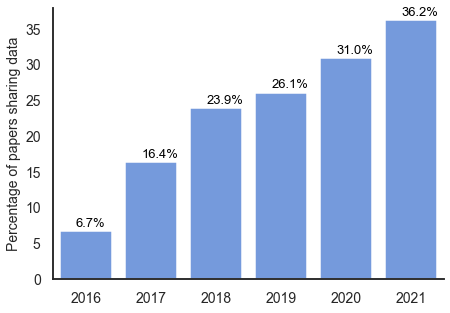

In [22]:
## Data availability trend
data = {'Year':['2016', '2017', '2018', '2019', '2020', '2021'],  
        'PercentageIncrease':[6.71, 16.41, 23.88, 26.11, 30.97, 36.19]}

df4 = pd.DataFrame(data, columns=['Year','PercentageIncrease'])

print(df4)

fig, ax= plt.subplots(figsize = (7,5)) 
#colors = ['#009FFA']
colors=['cornflowerblue']
sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Year', y = 'PercentageIncrease', ci=None, palette=colors)

total = 100
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.25, i.get_height()+.6, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=13,
                color='black')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage of papers sharing data", fontsize=14)
#plt.title("Code availability across 2016-2020", fontsize=14)
#plt.tight_layout()
sns.despine()
#plt.savefig(r'C:\Users\dhrit\code3.jpg', bbox_inches='tight', dpi=600)
plt.show()

   Year  PercentageIncrease
0  2016                0.83
1  2017                2.08
2  2018                3.12
3  2019                3.54
4  2020                5.41
5  2021                8.95


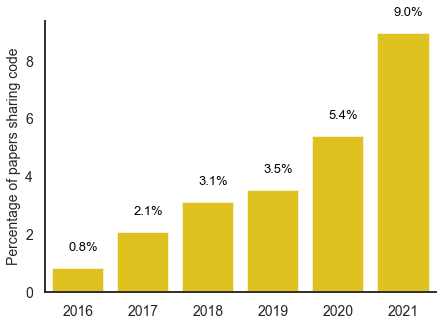

In [23]:
## Code availability trend
data = {'Year':['2016', '2017', '2018', '2019', '2020', '2021'],  
        'PercentageIncrease':[0.83, 2.08, 3.12, 3.54, 5.41, 8.95]}

df4 = pd.DataFrame(data, columns=['Year','PercentageIncrease'])

print(df4)

fig, ax= plt.subplots(figsize = (7,5)) 
#colors = ['#009FFA']
colors=['gold']
sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Year', y = 'PercentageIncrease', ci=None, palette=colors)

total = 100
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.25, i.get_height()+.6, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=13,
                color='black')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage of papers sharing code", fontsize=14)
#plt.title("Code availability across 2016-2020", fontsize=14)
#plt.tight_layout()
sns.despine()
#plt.savefig(r'C:\Users\dhrit\code3.jpg', bbox_inches='tight', dpi=600)
plt.show()


### Journal policies and code and data availability

In [24]:
data2 = {'Journal':['Bioinformatics', 'BMC_Bioinformatics', 'Genome_Biol','Genome_Med','Nat_Biotechnol', 'Nat_Genet',
                    'Nat_Methods','Nucleic_Acids_Res'], 
        'Total':[60,60,60,60,60,60,60,60], 
        'Share Code':[7, 1, 5, 4, 5, 7 ,13, 1],
        'Share Data':[3,2,17,12,17,18,15,13]}
df5 = pd.DataFrame(data2, columns=['Journal','Total', 'Share Code', 'Share Data'])
print(df5)

              Journal  Total  Share Code  Share Data
0      Bioinformatics     60           7           3
1  BMC_Bioinformatics     60           1           2
2         Genome_Biol     60           5          17
3          Genome_Med     60           4          12
4      Nat_Biotechnol     60           5          17
5           Nat_Genet     60           7          18
6         Nat_Methods     60          13          15
7   Nucleic_Acids_Res     60           1          13


In [25]:
data9 = {'Journal':['Journal 1', 'Journal 2', 'Journal 3', 'Journal 4', 'Journal 5', 'Journal 6',
                    'Journal 7', 'Journal 8'],
        'Journal Name': ['Bioinformatics', 'BMC_Bioinformatics', 'Genome_Biol', 'Genome_Med',
                         'Nat_Biotechnol', 'Nat_Genet', 'Nat_Methods','Nucleic_Acids_Res'],
        'Total':[60,60,60,60,60,60,60,60], 
        'Share Code':[7, 1, 5, 4, 5, 7 ,13, 1],
        'Share Data':[3,2,17,12,17,18,15,13],
        'Code Sharing Policy':['Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory','Mandatory','Mandatory','Encouraged'],
        'Data Sharing Policy':['Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory','Mandatory','Mandatory','Mandatory'], 
        'Code Sharing Percentage': [11.66, 1.66,8.33,6.66,8.33,11.66,21.66,1.66],
        'Data Sharing Percentage': [5,3.33,28.33,20,28.33,30,25,21.66]}
df9 = pd.DataFrame(data9, columns=['Journal','Journal Name','Total', 'Share Code', 'Share Data',
                                   'Code Sharing Policy', 'Data Sharing Policy', 'Code Sharing Percentage', 'Data Sharing Percentage'])
df9

,Journal,Journal Name,Total,Share Code,Share Data,Code Sharing Policy,Data Sharing Policy,Code Sharing Percentage,Data Sharing Percentage
0,Journal 1,Bioinformatics,60,7,3,Mandatory,Mandatory,11.66,5.00
1,Journal 2,BMC_Bioinformatics,60,1,2,Encouraged,Encouraged,1.66,3.33
2,Journal 3,Genome_Biol,60,5,17,Mandatory,Mandatory,8.33,28.33
3,Journal 4,Genome_Med,60,4,12,Encouraged,Encouraged,6.66,20.00
4,Journal 5,Nat_Biotechnol,60,5,17,Mandatory,Mandatory,8.33,28.33
5,Journal 6,Nat_Genet,60,7,18,Mandatory,Mandatory,11.66,30.00
6,Journal 7,Nat_Methods,60,13,15,Mandatory,Mandatory,21.66,25.00
7,Journal 8,Nucleic_Acids_Res,60,1,13,Encouraged,Mandatory,1.66,21.66


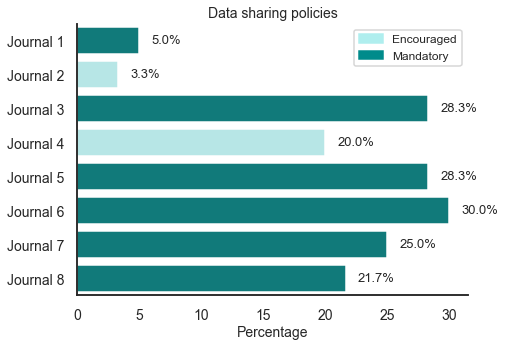

In [26]:
fig, ax= plt.subplots(figsize = (7,5)) 

#darkcyan=Mandatory
#paleturquoise=Encouraged
colors = ['darkcyan', 'paleturquoise', 'darkcyan','paleturquoise','darkcyan', 'darkcyan','darkcyan','darkcyan']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df9, x = 'Data Sharing Percentage', y =  'Journal', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

Encouraged = mpatches.Patch(color='paleturquoise', label='Encouraged')
Mandatory= mpatches.Patch(color='darkcyan', label='Mandatory')

plt.legend(handles=[Encouraged,Mandatory], fontsize=12)
plt.title('Data sharing policies', fontsize=14)

sns.despine()

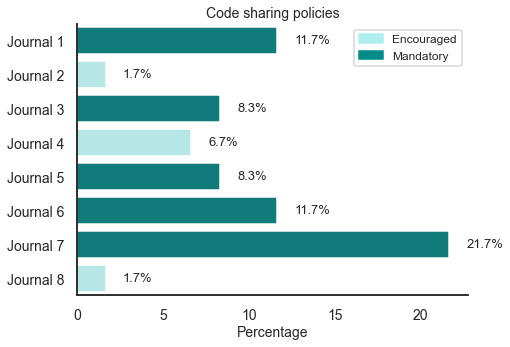

In [27]:
fig, ax= plt.subplots(figsize = (7,5)) 
#darkcyan=Mandatory
#c=Encouraged
#paleturquoise=No Policy
colors = ['darkcyan', 'paleturquoise', 'darkcyan','paleturquoise','darkcyan', 'darkcyan','darkcyan','paleturquoise']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df9, x = 'Code Sharing Percentage', y =  'Journal', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

Encouraged = mpatches.Patch(color='paleturquoise', label='Encouraged')
Mandatory= mpatches.Patch(color='darkcyan', label='Mandatory')

plt.legend(handles=[Encouraged,Mandatory], fontsize=12)
plt.title('Code sharing policies', fontsize=14)

sns.despine()

### Code and data availability statements

Data and statement available - 88 (88/268*100 = 32.83%);
Statement available no data- 81 (81/268*100 = 30.22%);
No statement no data - 90 (90/268*100 = 33.58%);
No statement but data avail- 9 (3.35%);
	
Code and statement available - 35 (35/480*100 = 7.29%);
Statement available no code - 170 (170/480*100 = 35.41%);
No statement no code - 267 (55.62%);
No statement but code avail - 8 (1.66%);

In [28]:
print(df['Data availability statement (yes/no)'].value_counts())

yes    169
no      99
Name: Data availability statement (yes/no), dtype: int64


In [29]:
print(df['Code availability statement (Yes/No)'].value_counts())

No     275
Yes    205
Name: Code availability statement (Yes/No), dtype: int64


                  Availability  Percentage
0  Data Availability Statement       63.05
1            Data Availability       36.20


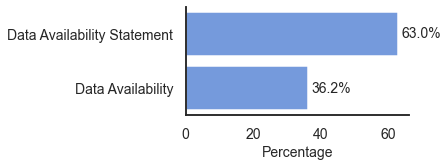

In [30]:
## Statement vs sharing 
data = {'Availability':['Data Availability Statement', 'Data Availability'],  
        'Percentage':[63.05, 36.2]}

df4 = pd.DataFrame(data, columns=['Availability','Percentage'])
print(df4)

fig, ax= plt.subplots(figsize = (4,2)) 
#cornflowerblue - data
#gold - code
colors = ['cornflowerblue', 'cornflowerblue']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Percentage', y =  'Availability', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=14)  # vertical alignment

sns.despine()

                  Availability  Percentage
0  Code Availability Statement        42.7
1            Code Availability         9.0


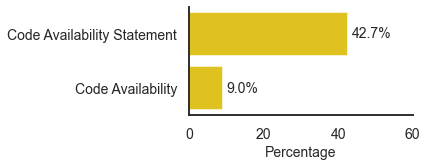

In [34]:
## Statement vs sharing 
data = {'Availability':['Code Availability Statement', 'Code Availability'],  
        'Percentage':[42.7, 9.0]}

df4 = pd.DataFrame(data, columns=['Availability','Percentage'])
print(df4)

fig, ax= plt.subplots(figsize = (4,2)) 
#cornflowerblue - data
#gold - code
colors = ['gold', 'gold']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Percentage', y =  'Availability', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)
plt.xlim(xmax=60)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=14)  # vertical alignment

sns.despine()